Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.fftpack import ifft, fft, fftfreq # functions to inverse fourier transform, fourier transform, and get frequencies of fourier transform respectively

In [3]:
num_samples = 1e5 # number of samples
time_span = 50 # time span of the signal (seconds)
times = np.linspace(0, time_span, int(num_samples)) # array of times (seconds)
freqs = fftfreq(len(times), time_span/num_samples) # array of frequencies (Hz)

frequency_A = 20*2*np.pi # frequency_A is 20 periods per second
frequency_B = 40*2*np.pi # frequency_B is 40 periods per second

attenuation_A = 1/2 # reduce magntude to 50% at frequency_A
attenuation_B = 1/10 # reduce magntude to 10% at frequency_B

phase_shift_A = 1/2 # phase shift by 1/2 at frequency_A
phase_shift_B = -1 # phase shift by -1 at frequency_B

We define two frequencies that will be present in the waveforms. We will apply an attenuation (attenuation_A, attenuation_B) and phase shift (phase_shift_A, phase_shift_B) for at those frequencies to simulate the waveform after the long cable.

## (Unrealistic) Waveform taken through just short cable

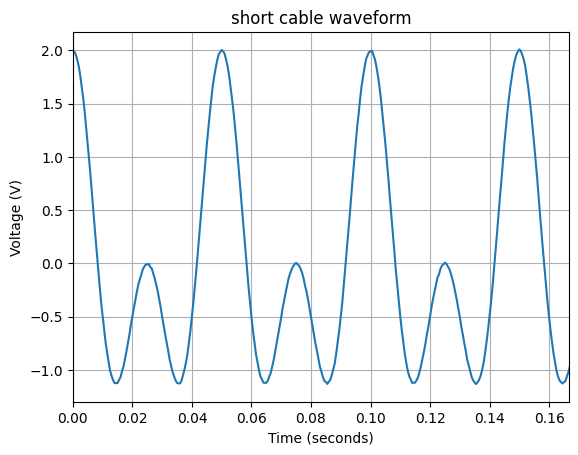

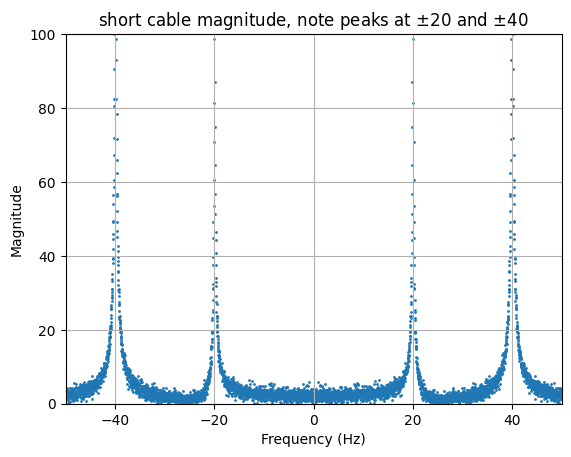

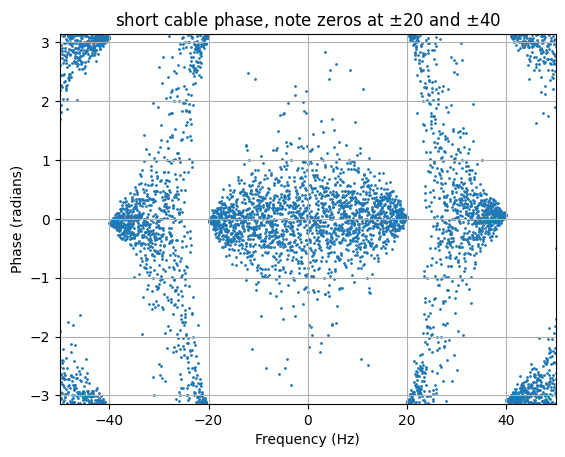

In [4]:
voltage_short = np.cos(frequency_A*times) + np.cos(frequency_B*times) + np.random.normal(0, 0.005, len(times)) # array of voltages at frequency_A and frequency_B plus random noise
ft_short = fft(voltage_short) # array of complex values for each frequency in freqs
mag_short = np.abs(ft_short) # array of magnitudes for each frequency in freqs
phase_short = np.angle(ft_short) # array of phases (in radians) for each frequency in freqs

plt.title('short cable waveform')
plt.plot(times, voltage_short)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.xlim(0, time_span/300)
plt.show()

plt.title('short cable magnitude, note peaks at $\pm$20 and $\pm$40')
plt.scatter(freqs, mag_short, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.ylim(0, 100)
plt.xlim(-50, 50)
plt.show()

plt.title('short cable phase, note zeros at $\pm$20 and $\pm$40')
plt.scatter(freqs, phase_short, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.ylim(-np.pi, np.pi)
plt.xlim(-50, 50)
plt.show()

As we would expect, there are peaks at the frequencies of the cosines at plus minus 20 and 40, which is what we used in the cosines (frequency_A, frequency_B). For the phase, we have zeros at plus minus 20 and 40 since we did not add any phase in the cosines.

## (Unrealistic) Waveform taken through short cable and long cable

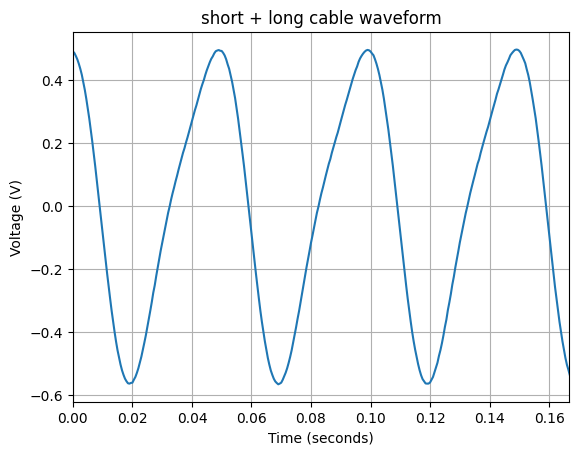

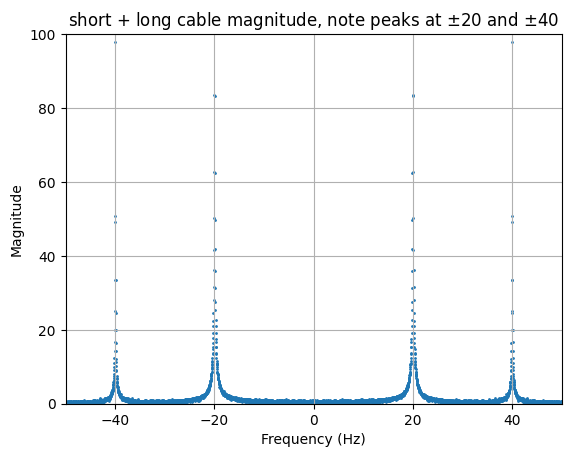

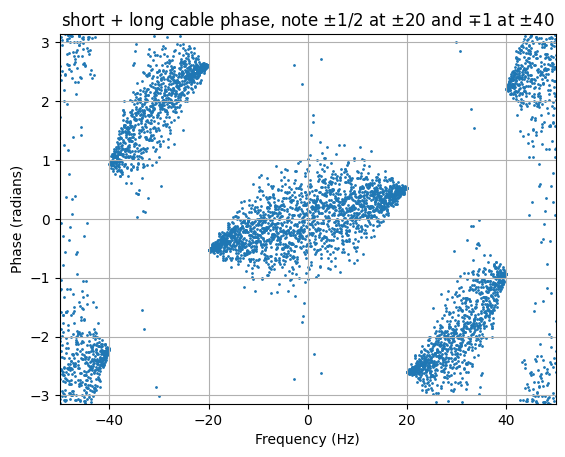

In [5]:
voltage_long = attenuation_A*np.cos(frequency_A*times + phase_shift_A) + attenuation_B*np.cos(frequency_B*times + phase_shift_B) + np.random.normal(0, 0.001, len(times)) # array of voltages at frequency_A and frequency_B plus random noise
ft_long = fft(voltage_long) # array of complex values for each frequency in freqs
mag_long = np.abs(ft_long) # array of magnitudes for each frequency in freqs
phase_long = np.angle(ft_long) # array of phases (in radians) for each frequency in freqs

plt.title('short + long cable waveform')
plt.plot(times, voltage_long)
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.grid()
plt.xlim(0, time_span/300)
plt.show()

plt.title('short + long cable magnitude, note peaks at $\pm$20 and $\pm$40')
plt.scatter(freqs, mag_long, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.ylim(0, 100)
plt.xlim(-50, 50)
plt.show()

plt.title('short + long cable phase, note $\pm 1/2$ at $\pm$20 and $\mp 1$ at $\pm$40')
plt.scatter(freqs, phase_long, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.grid()
plt.ylim(-np.pi, np.pi)
plt.xlim(-50, 50)
plt.show()

Here we still see peaks at plus minus 20 and 40, but the peaks at are smaller since we set the phase_shift to be 1/2 and 1/10 (attenuation_A, attenuation_B), which is what we used in short + long cable waveform. The phases are $\pm \frac 12$ at a frequency of 20, and $\mp 1$ at a frequency of 40 (phase_shift_A, phase_shift_B), which is what we used in short + long cable waveform.

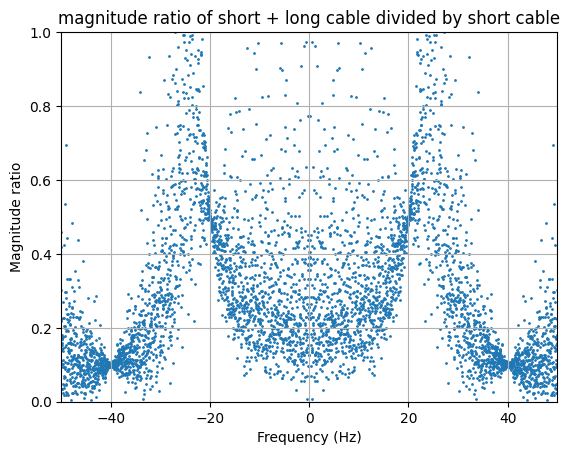

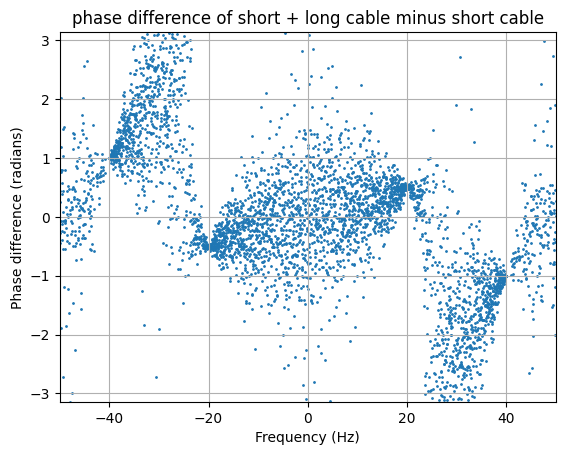

In [6]:
#what long cable does (transfer function)
mag_ratio = mag_long/mag_short # array of ratio of manitudes
phase_diff = phase_long - phase_short # array of difference of phases

plt.title('magnitude ratio of short + long cable divided by short cable')
plt.scatter(freqs, mag_ratio, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude ratio')
plt.grid()
plt.ylim(0, 1)
plt.xlim(-50, 50)
plt.show()

plt.title('phase difference of short + long cable minus short cable')
plt.scatter(freqs, phase_diff, s=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase difference (radians)')
plt.grid()
plt.ylim(-np.pi, np.pi)
plt.xlim(-50, 50)
plt.show()

Here we still see peaks at a frequency of $\pm 20$ and $\pm 40$, but the peaks at are smaller since we set the attenuation to be 1/2 and 1/10 (attenuation_A, attenuation_B), which is what we used in short + long cable waveform. The phase shift/differences are $\pm \frac 12$ at a frequency of 20, and $\mp 1$ at a frequency of 40 (phase_shift_A, phase_shift_B), which is what we used in short + long cable waveform. 

Note that we have found the difference in phase shifts between the short and short + long, which yields the phase shift caused by just the long cable. This magnitude ratio and phase difference is what we will use for the transfer function.

c:\Users\kolaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


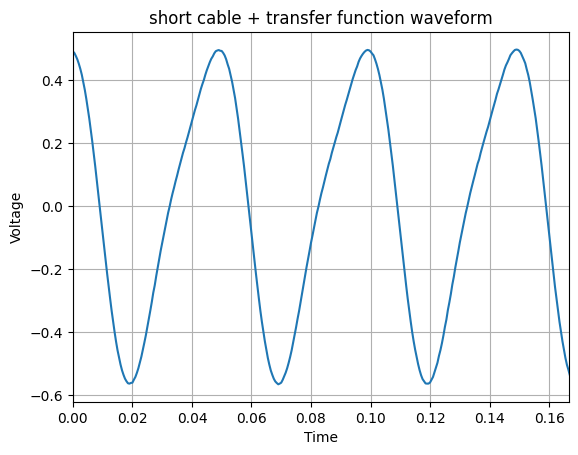

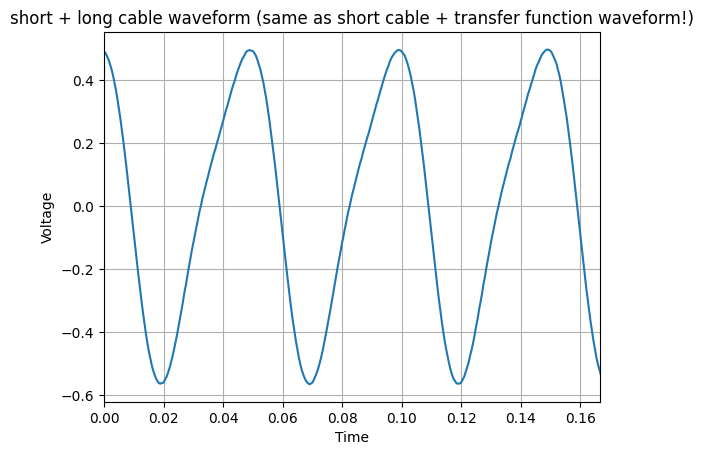

In [7]:
#apply long cable transfer function to short cable to get long + short cable, should be same as voltage2
mag_long_transformed = mag_short*mag_ratio
phase_long_transformed = phase_short + phase_diff

voltage_short_to_long = ifft(
    mag_long_transformed * np.exp(1j*phase_long_transformed) # magnitude times complex phase
    )

plt.title('short cable + transfer function waveform')
plt.plot(times, voltage_short_to_long)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid()
plt.xlim(0, time_span/300)
plt.show()

plt.title('short + long cable waveform (same as short cable + transfer function waveform!)')
plt.plot(times, voltage_long)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.grid()
plt.xlim(0, time_span/300)
plt.show()

We can see that the transfer function is able to use just the magnitude ratio, phase shift, and the short cable waveform (without the short + long cable waveform) to simulate the short + long cable waveform. For a different waveform through the short cable, we can still use the same magnitude ratio and phase shift to find what the waveform looks like after going throught the short + long cable.

For the same cable, the magnitude ratio and phase shift does not change, no matter the waveform. For most cables, we can measure the magnitude ratio and phase shift once, and apply it to any waveform we want to see what the cable does.